# Natural Language Processing

Natural Language Processing (NLP) is an ML algorithm used to work with text. Among its objectives are:
* Compile documents
* Categrize
* Compare your parameters

For example:
* You have 2 documents:
    * "Blue house"
    * "Red house"

* You can categorize based on word count:
    * "Blue house" -> (red, blue, house) -> (0,1,1)
    * "Red house" -> (red, blue, house) -> (1,0,1)

A document represented by a vector of word is called to ["bag of words"](https://www.mygreatlearning.com/blog/bag-of-words/). That way, you can use the cosine similarity on the vectors to determine how similar they are.

$$  sim(A,B) = cos(\Theta ) = \frac{(A \times B)} {(\left\|A \right\|\left\|B \right\|)}  $$ 

You can optimize the bag of words technique by adjusting the word count by how often they appear across the entire document set. For this, we use TF-IDF (Term Frequency - Inverse Document Frequency). When:
* **Term frequency** - Importance of term in the document
    * TF(d,t) - Occurence  number of term t in document d
* **Inverse document frequency** - Importance of term in the whole set of documents.
    * IDF(t) = log(D/t), where:
        * D - Total number of documents
        * t - Number of documents with the term


Mathematically, TF-IDF it is expressed like this:

$$  W_x,_y = tf_x,_y \times log \frac{N} {df_x}  $$ 

Where:
* tf<sub>x,y</sub> = frequency of *x* in *y*
* df<sub>x</sub> = number of documents containing x
* N = total number of documents

# Imports

In [45]:
import nltk
import string
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from nltk.corpus                     import stopwords
from sklearn.metrics                 import classification_report, confusion_matrix
from sklearn.pipeline                import Pipeline
from sklearn.naive_bayes             import MultinomialNB
from sklearn.model_selection         import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

%matplotlib inline

In [4]:
messages=[line.rstrip() for line in open('data/smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
for message_number, message in enumerate(messages[:15]):
    print(message_number, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [10]:
messages = pd.read_csv('data/smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Exploratory

In [11]:
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
messages['lenght'] = messages['message'].apply(len)
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


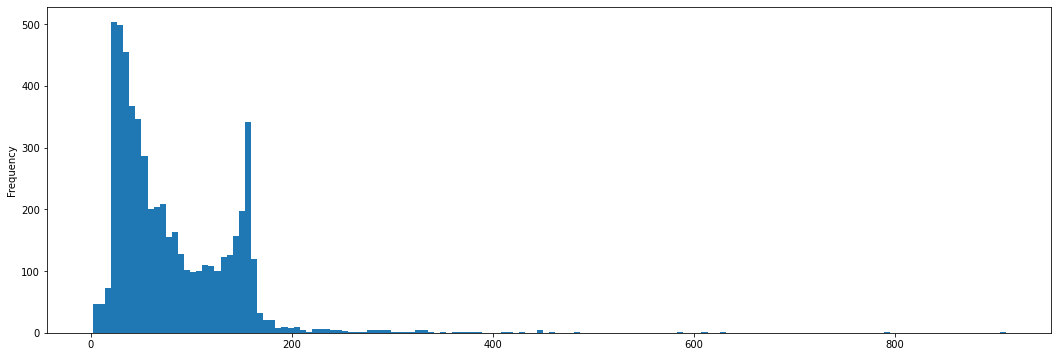

In [19]:
plt.figure(figsize=(18,6))
messages['lenght'].plot(kind='hist', bins=150);

In [20]:
messages.lenght.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

In [22]:
messages[messages['lenght']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

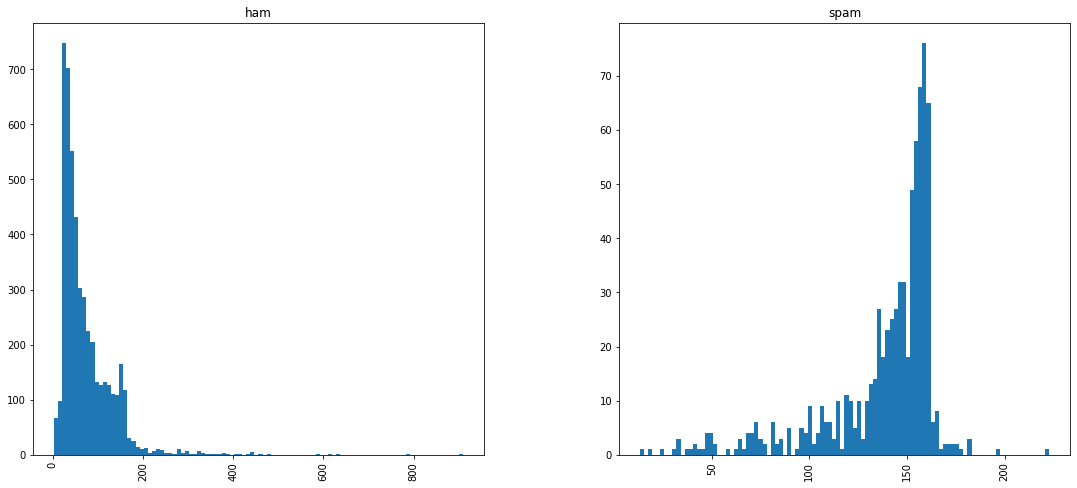

In [25]:
messages.hist(bins=100, column='lenght', by='label', figsize=(18, 8));

# Data Transformation

In [27]:
mess = 'Mensagem de exemplo! Notem: ela possui pontuação'

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
# Exemple to remove punctuation 
sempont = [char for char in mess if char not in string.punctuation] # remove punctuation
sempont = ''.join(sempont) # Putting the characters back together
sempont

'Mensagem de exemplo Notem ela possui pontuação'

In [32]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
# Example to clean text
tst = 'Sample message! Notice: it has punctuation.'
clean_message = [word for word in tst.split() if word.lower() not in stopwords.words('english')]
clean_message

In [48]:
def text_process(mess):
    # remove puntuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join strings again
    nopunc = ''.join(nopunc)
    
    # remove stopwors
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 
    
    return sms

In [46]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [52]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [54]:
print(len(bow_transformer.vocabulary_))

11425


In [55]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [56]:
bow4 =bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [60]:
print(bow_transformer.get_feature_names_out()[4068])
print(bow_transformer.get_feature_names_out()[9554])

U
say


In [61]:
messages_bow = bow_transformer.transform(messages['message'])

In [64]:
print(messages_bow.shape)
print(messages_bow.nnz)

(5572, 11425)
50548


In [73]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity: {} % da matriz não é zero'.format(sparsity))

Sparsity: 0.07940295412668218 % da matriz não é zero


In [75]:
tdidf_transformer = TfidfTransformer()

In [76]:
tdidf_transformer = tdidf_transformer.fit(messages_bow)

In [78]:
tdidf4 = tdidf_transformer.transform(bow4)
print(tdidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [81]:
messages_tdidf = tdidf_transformer.transform(messages_bow)
spam_detect_model = MultinomialNB().fit(messages_tdidf, messages['label'])

In [83]:
print('Predito: ', spam_detect_model.predict(tdidf4)[0])
print('Esperado: ', messages['label'][3])

Predito:  ham
Esperado:  ham


In [86]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)
msg_train

2025              U having lunch alone? I now so bored...
553     Sure, if I get an acknowledgement from you tha...
1810                Aight, I'll ask a few of my roommates
1591    Somewhr someone is surely made 4 u. And God ha...
4037                              How are you holding up?
                              ...                        
3696    Hello, As per request from  &lt;#&gt;  Rs.5 ha...
5407    Yup he msg me: is tat yijue? Then i tot it's m...
1658    S:-)if we have one good partnership going we w...
5094    Hi Shanil,Rakhesh here.thanks,i have exchanged...
3072       Apart from the one i told you about yesterday?
Name: message, Length: 4457, dtype: object

In [88]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [89]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fc756526670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [90]:
pred = pipeline.predict(msg_test)

In [92]:
print(classification_report(pred, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.94      0.97      1006
        spam       0.65      1.00      0.79       109

    accuracy                           0.95      1115
   macro avg       0.83      0.97      0.88      1115
weighted avg       0.97      0.95      0.95      1115



# Project Test

In [3]:
yelp = pd.read_csv('data/yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Data Exploratory Analysis

In [7]:
yelp.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [9]:
yelp['len_text'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,len_text
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


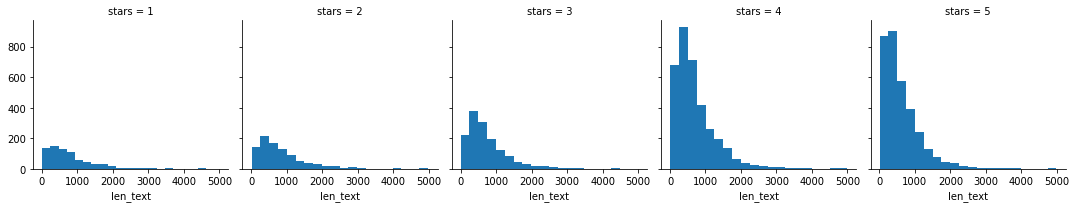

In [11]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'len_text', bins=20);

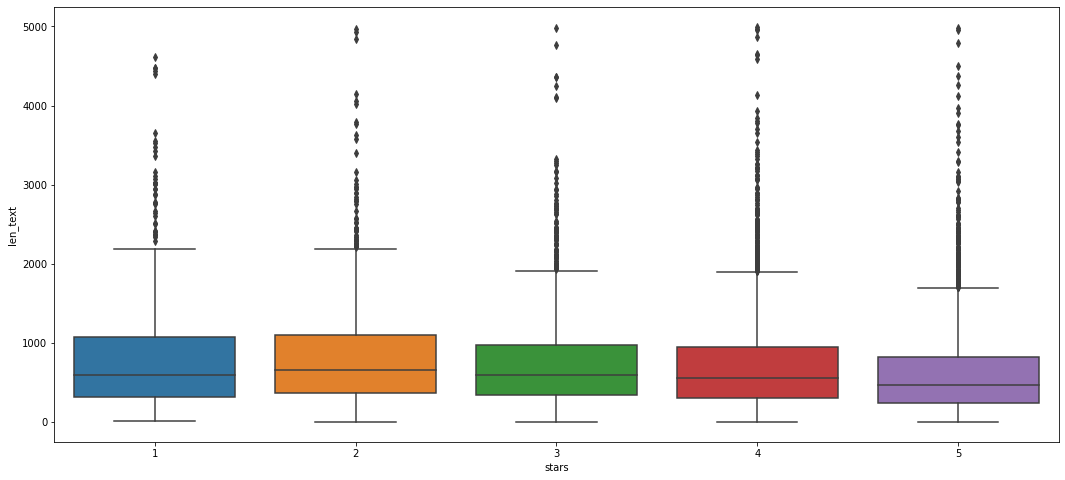

In [15]:
plt.figure(figsize=(18,8))
sns.boxplot(x='stars', y='len_text', data=yelp);

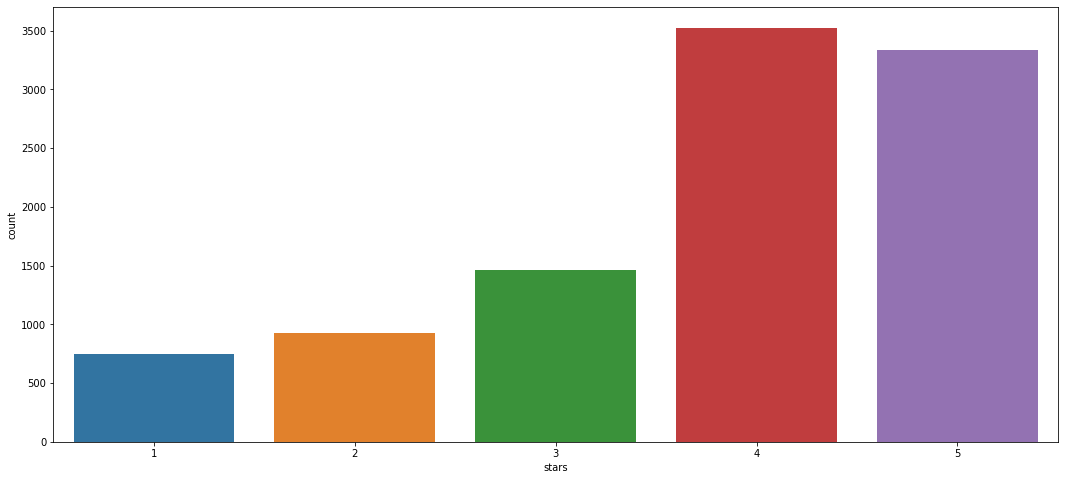

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(x='stars', data=yelp);

In [20]:
star = yelp.groupby('stars').mean()
star

,cool,useful,funny,len_text
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [22]:
star.corr()

,cool,useful,funny,len_text
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
len_text,-0.857664,0.699881,0.843461,1.000000


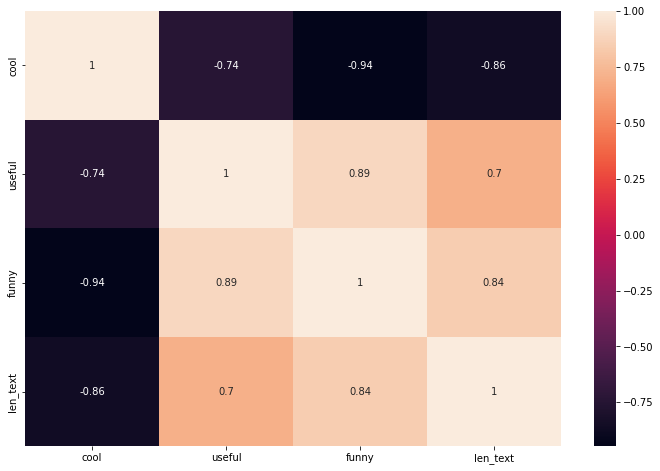

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(star.corr(), annot=True);

## Classification NLP

In [34]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [35]:
x = yelp_class['text']
y = yelp_class['stars']

In [36]:
cv = CountVectorizer()

In [39]:
x = cv.fit_transform(x)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=101)

In [41]:
nb = MultinomialNB()

In [42]:
nb.fit(x_train, y_train)

MultinomialNB()

In [43]:
pred = nb.predict(x_test)

In [46]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

[[159  69]
 [ 22 976]]


## Using NLP

In [54]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [55]:
x = yelp_class['text']
y = yelp_class['stars']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=101)

In [56]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f44d79808b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [57]:
pred = pipeline.predict(x_test)

In [58]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

[[  0 228]
 [  0 998]]


/home/fernando/.pyenv/versions/3.9.0/envs/padrao/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fernando/.pyenv/versions/3.9.0/envs/padrao/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fernando/.pyenv/versions/3.9.0/envs/padrao/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_